In [3]:
# This program is used to calculate VaR.
#Check how can you incorporate copula

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

random.seed(444)

assets = ['FB','AAPL','AMZN','GOOG','NFLX']
weights=np.array([0.1,0.1,0.1,0.1,0.1])

endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=500)

df = pd.DataFrame()

#df['GME']=web.DataReader('GME',data_source='yahoo',start=stock_startdate, end=stock_enddate)
for asset in assets:
    
    df[asset] = yf.download(asset,startDate,endDate)['Adj Close']

returns= df.pct_change()
returns.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:

returns

,FB,AAPL,AMZN,GOOG,NFLX
Date,,,,,
2020-02-25,-0.019679,-0.033872,-0.018191,-0.023312,-0.023352
2020-02-26,0.002185,0.015864,0.003472,0.003407,0.053181
2020-02-27,-0.037779,-0.065368,-0.048136,-0.053898,-0.019855
2020-02-28,0.014335,-0.000585,-0.000292,0.016114,-0.007210
2020-03-02,0.020627,0.093101,0.037266,0.037168,0.032572
...,...,...,...,...,...
2021-07-01,0.019211,0.002263,-0.002090,0.008399,0.010091
2021-07-02,0.000875,0.019596,0.022724,0.018600,0.000825
2021-07-06,-0.005413,0.014718,0.046927,0.008173,0.014345


In [5]:
def port_mean(df,weights):
    return np.dot(df.mean(), weights)

def portfolioStd(df,weights):
    var=np.dot(weights.T,np.dot(df.cov(),weights))
    return np.sqrt(var)

def ParametricVaR(df,weights,alpha=5):
    temp=norm.ppf(alpha/100)*portfolioStd(df,weights)+ port_mean(df,weights)
    return temp

def ParametricCVaR(df,weights,alpha=5):
    CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*portfolioStd(df,weights) - port_mean(df,weights)
    return CVaR

def HistoricalVaR(df,weights,alpha=5):
    new_returns=df.copy()
    new_returns['Portfolio Return']=new_returns.dot(weights)
    return np.percentile(new_returns['Portfolio Return'],alpha)

def HistoricalCVaR(df,weights,alpha=5):
    new_returns=df.copy()
    new_returns['Portfolio Return']=new_returns.dot(weights)
    belowVaR = new_returns['Portfolio Return']<=HistoricalVaR(df,weights,alpha)
    below=new_returns['Portfolio Return'][belowVaR]
    return below.mean()


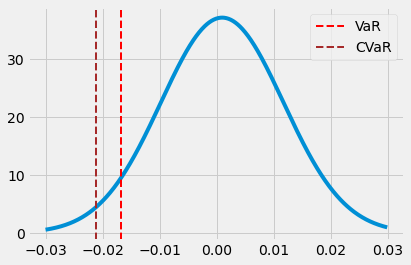

In [6]:
a=ParametricVaR(returns,weights,5)
x=np.arange(-0.03,0.03,0.0001)
norm_dist=norm.pdf(x,port_mean(returns,weights),portfolioStd(returns,weights))
plt.style.use('fivethirtyeight')
plt.plot(x,norm_dist)
plt.axvline(a,linestyle='dashed',color='red',linewidth=2,label="VaR")
b=ParametricCVaR(returns,weights,5)
plt.axvline(-b,linestyle='dashed',color='brown',linewidth=2,label="CVaR")
plt.legend()
plt.show()

In [13]:
-ParametricVaR(returns,weights,alpha=5)*100000

1670.451920692362

In [14]:
ParametricCVaR(returns,weights,alpha=5)*100000
    

2119.3153887010453

In [15]:
HistoricalVaR(returns,weights,alpha=5)*100000

-1708.8248142899627

In [16]:
HistoricalCVaR(returns,weights,alpha=5)*100000

-2414.4336305537267